## Checkpoint 8: K-means & Hierarchical Clustering 

###### By: Yasmine TOLBA

In [72]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### Step 1: getting familiar with our dataset

In [73]:
df = pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [75]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [76]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [77]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [78]:
#minimum payments contain too many NaN values, let's get rid of it 
df.drop(['MINIMUM_PAYMENTS'], axis=1, inplace = True)
df.fillna(df.CREDIT_LIMIT.mean(), inplace=True)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,0.250000,6


### Step 2: Preprocessing

For clustering, it's better to have only 2 features, to achieve that, we can use dimentionality reduction with the PCA method. <br>
We will start by removing the object columns, which in our case is just cust_id, as it serves no purpose. <br>
We will then scale the data, and reduce it to just 2 dimensions, then we can plot our points, and form our clusters.

In [79]:
#remove the object column:
df.drop(['CUST_ID'], axis = 1, inplace=True)
scaled_data = StandardScaler().fit_transform(df)
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,0.329200,-4.122768


In [80]:
#double check if all values are valid and usable
print(np.argwhere(np.isnan(scaled_data)))

[]


In [82]:
pca = PCA(n_components=2).fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(8950, 2)

In [83]:
scores_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
scores_df

,PC1,PC2
0,-1.645822,-1.092972
1,-1.195073,2.496318
2,0.985082,-0.340737
3,-0.875651,0.018494
4,-1.574178,-0.708668
...,...,...
8945,-0.296715,-1.983553
8946,-0.532040,-1.680126
8947,-0.869388,-1.796040
8948,-2.301469,-0.653046


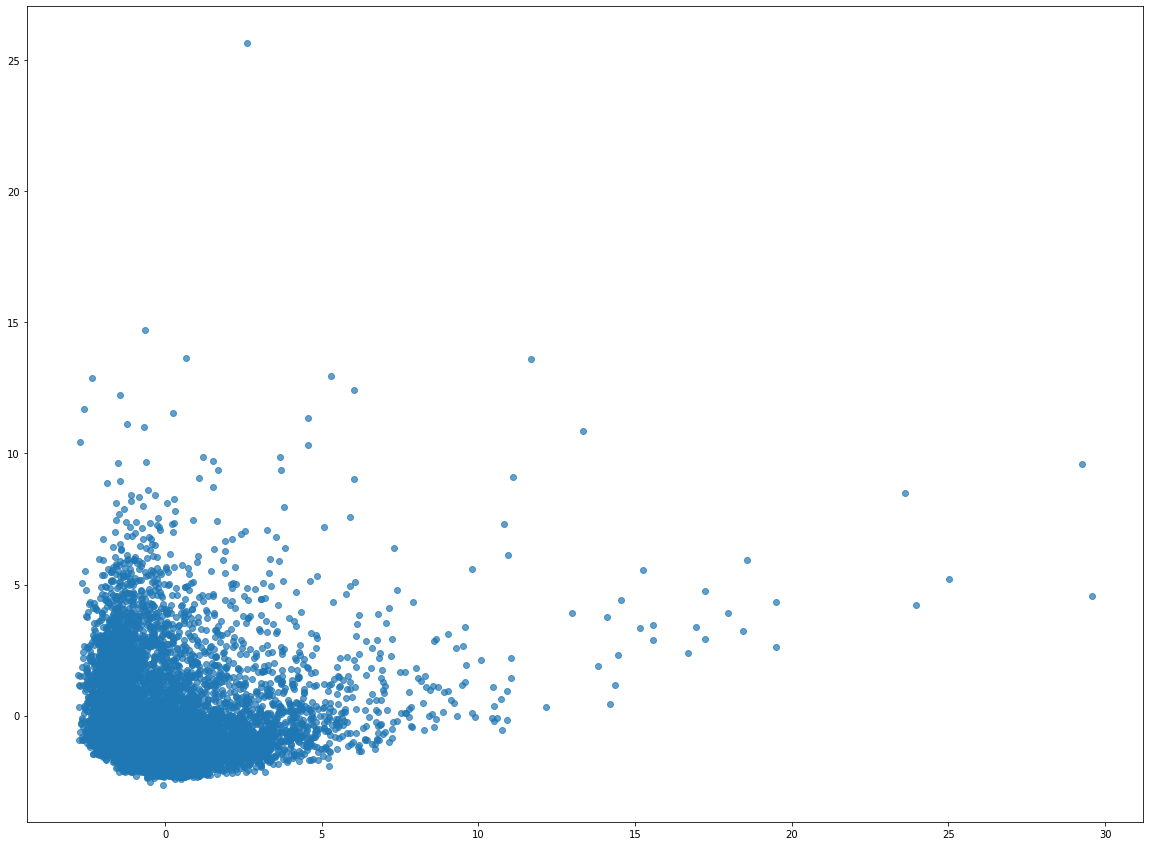

In [84]:
plt.figure(figsize=(20,15))
plt.scatter(x_pca[:,0], x_pca[:,1], alpha=0.7)

### Step 3: Clustering

C:\Users\YsPC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


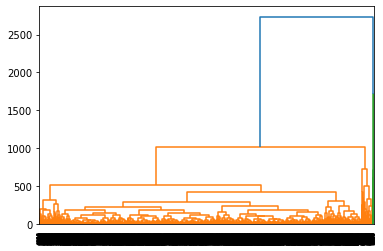

In [85]:
myLinkage =  hierarchy.linkage(distance_matrix(x_pca,x_pca),'complete')   
#Dendogram 
dendro = hierarchy.dendrogram(myLinkage)

In [86]:
labels = hierarchy.fcluster(myLinkage,500, criterion='distance')                      #  Cut at the height (distance) = 0.23 <= change this value at will.
pd.Series(labels).value_counts()

2    8054
1     555
4     258
3      47
8      19
7      11
6       4
5       2
dtype: int64

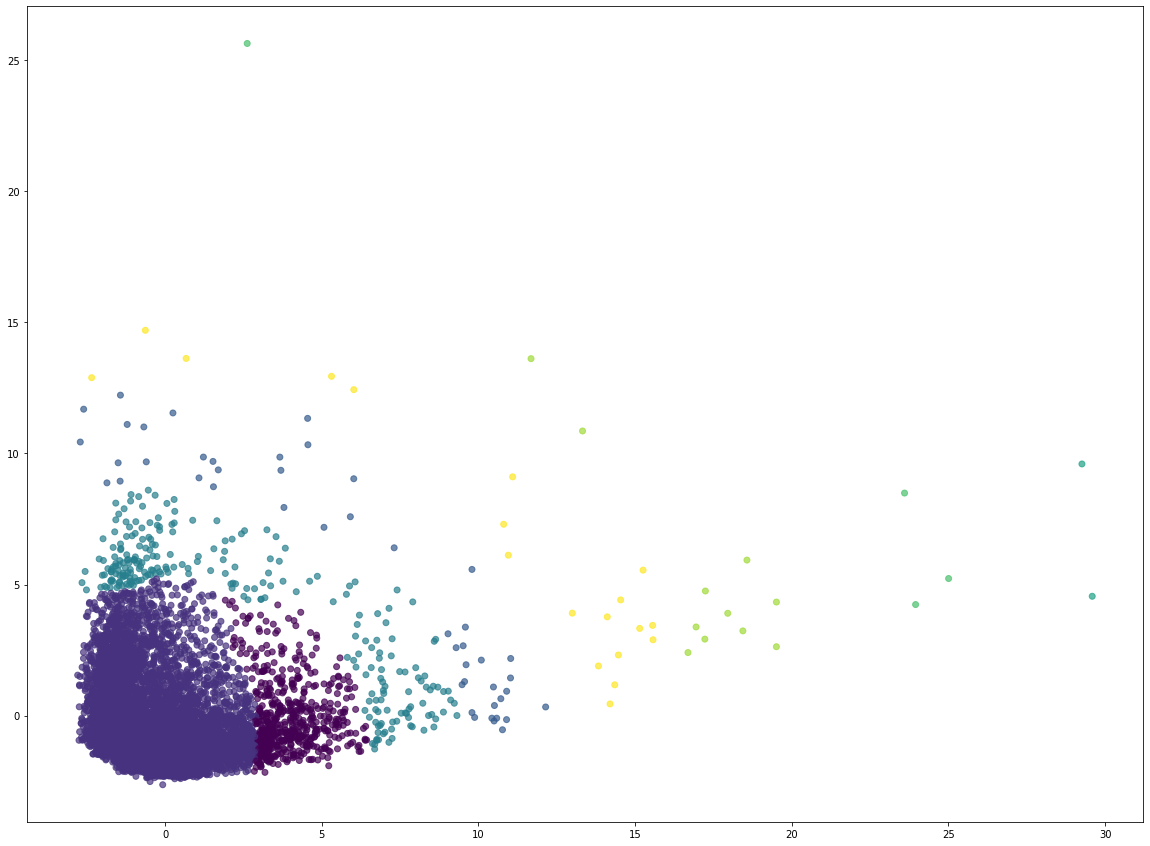

In [87]:
plt.figure(figsize=(20,15))
plt.scatter(x_pca[:,0], x_pca[:,1], c= labels, alpha=0.7)

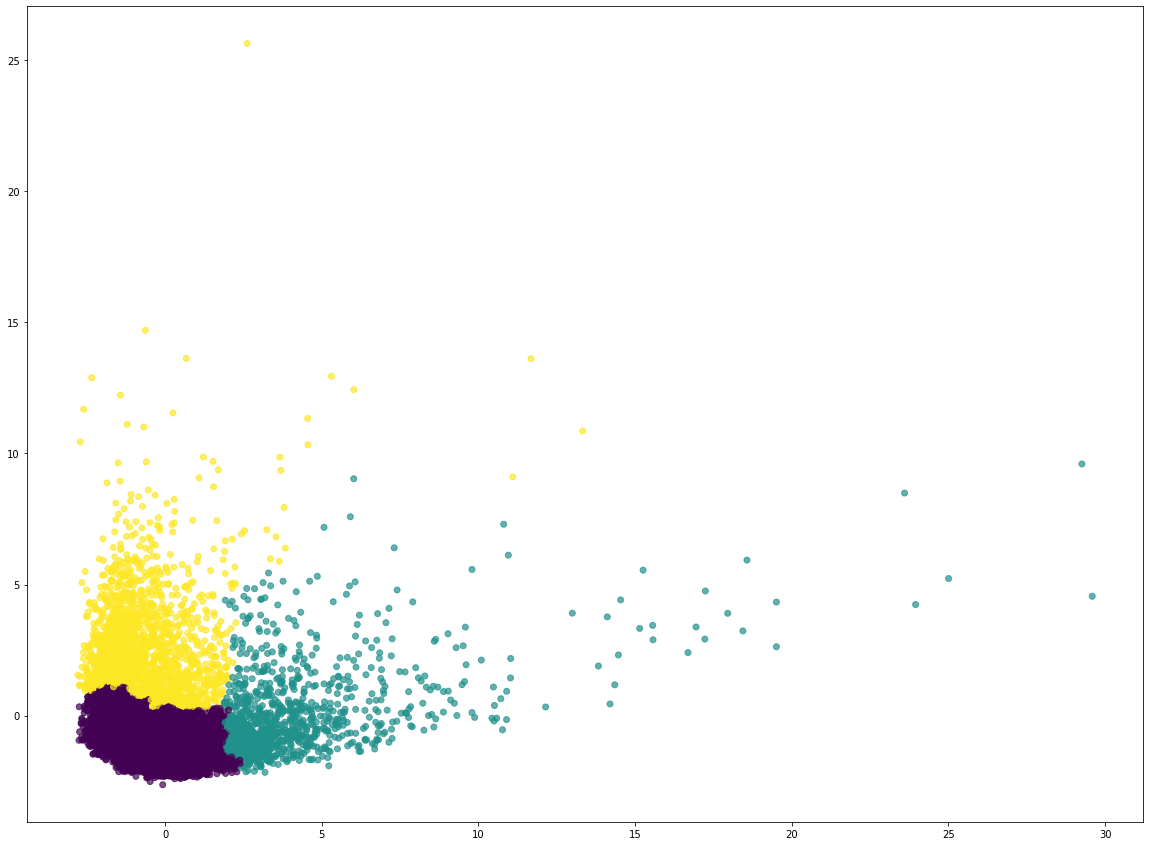

In [88]:
agglomerative = AgglomerativeClustering(n_clusters=3)              
agglomerative = agglomerative.fit(x_pca)                                   
#Scatter plot to vizualise 
plt.figure(figsize=(20,15))
plt.scatter(x_pca[:,0], x_pca[:,1], c= agglomerative.labels_, alpha=0.7)   

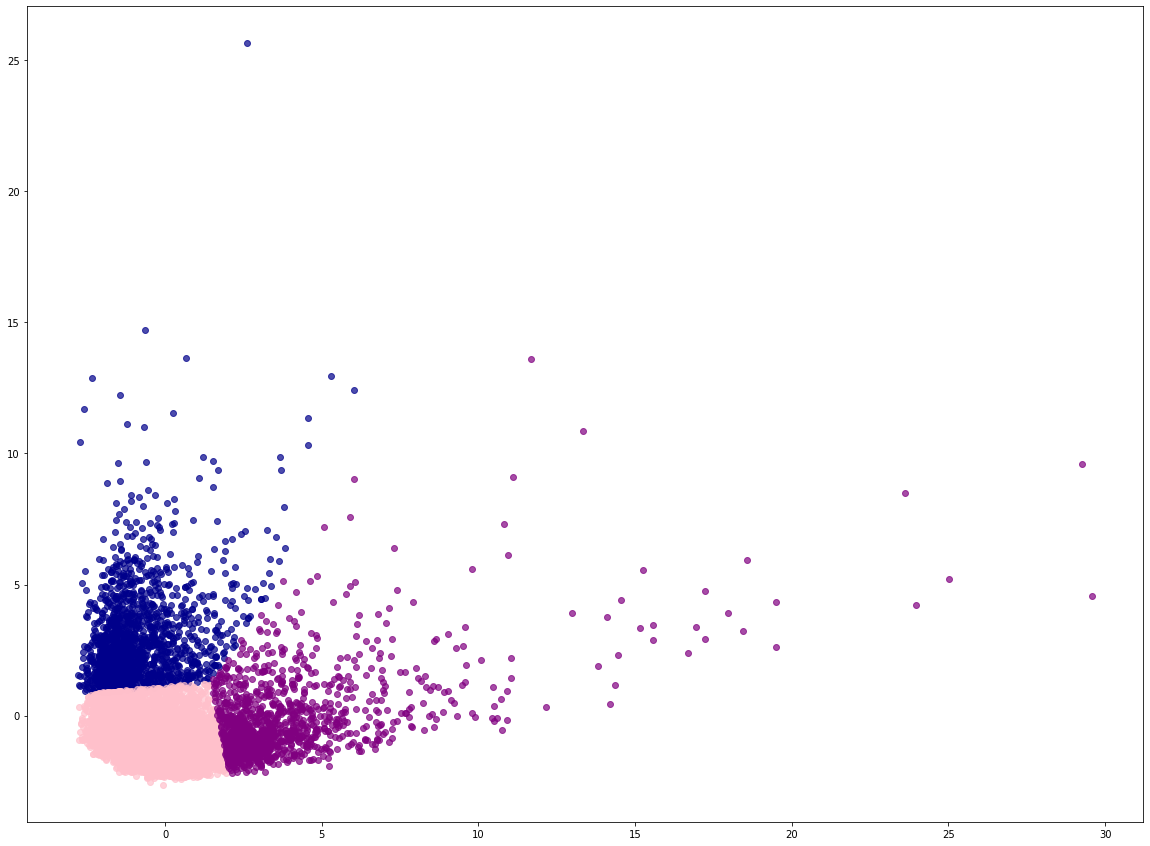

In [89]:
#now onto kmeans
km = KMeans(n_clusters=3)
y_km = km.fit_predict(x_pca)
plt.figure(figsize=(20,15))
plt.scatter(x_pca[y_km == 0,0], x_pca[y_km == 0,1], c= 'darkblue', alpha=0.7) 
plt.scatter(x_pca[y_km == 1,0], x_pca[y_km == 1,1], c= 'pink', alpha=0.7) 
plt.scatter(x_pca[y_km == 2,0], x_pca[y_km == 2,1], c= 'purple', alpha=0.7) 

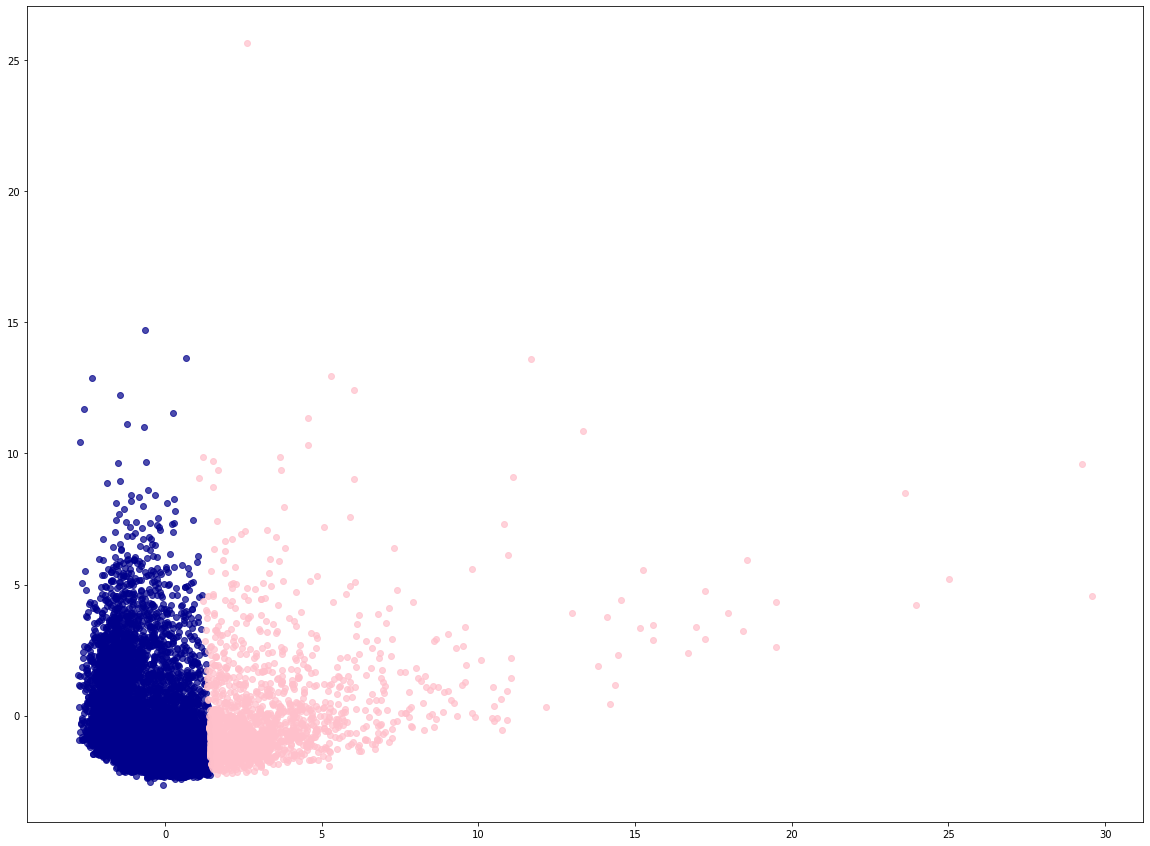

In [90]:
km = KMeans(n_clusters=2)
y_km = km.fit_predict(x_pca)
plt.figure(figsize=(20,15))
plt.scatter(x_pca[y_km == 0,0], x_pca[y_km == 0,1], c= 'darkblue', alpha=0.7) 
plt.scatter(x_pca[y_km == 1,0], x_pca[y_km == 1,1], c= 'pink', alpha=0.7) 

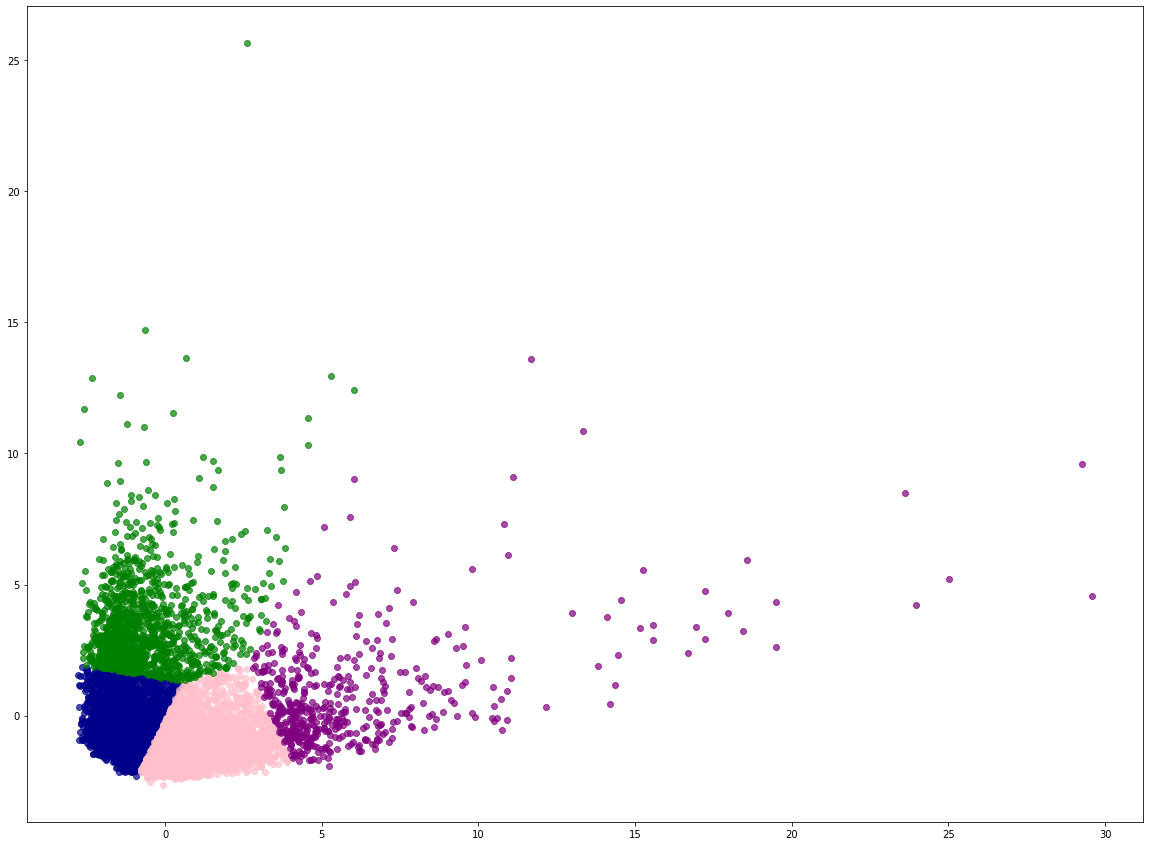

In [91]:
km = KMeans(n_clusters=4)
y_km = km.fit_predict(x_pca)
plt.figure(figsize=(20,15))
plt.scatter(x_pca[y_km == 0,0], x_pca[y_km == 0,1], c= 'darkblue', alpha=0.7) 
plt.scatter(x_pca[y_km == 1,0], x_pca[y_km == 1,1], c= 'pink', alpha=0.7) 
plt.scatter(x_pca[y_km == 2,0], x_pca[y_km == 2,1], c= 'purple', alpha=0.7) 
plt.scatter(x_pca[y_km == 3,0], x_pca[y_km == 3,1], c= 'green', alpha=0.7) 


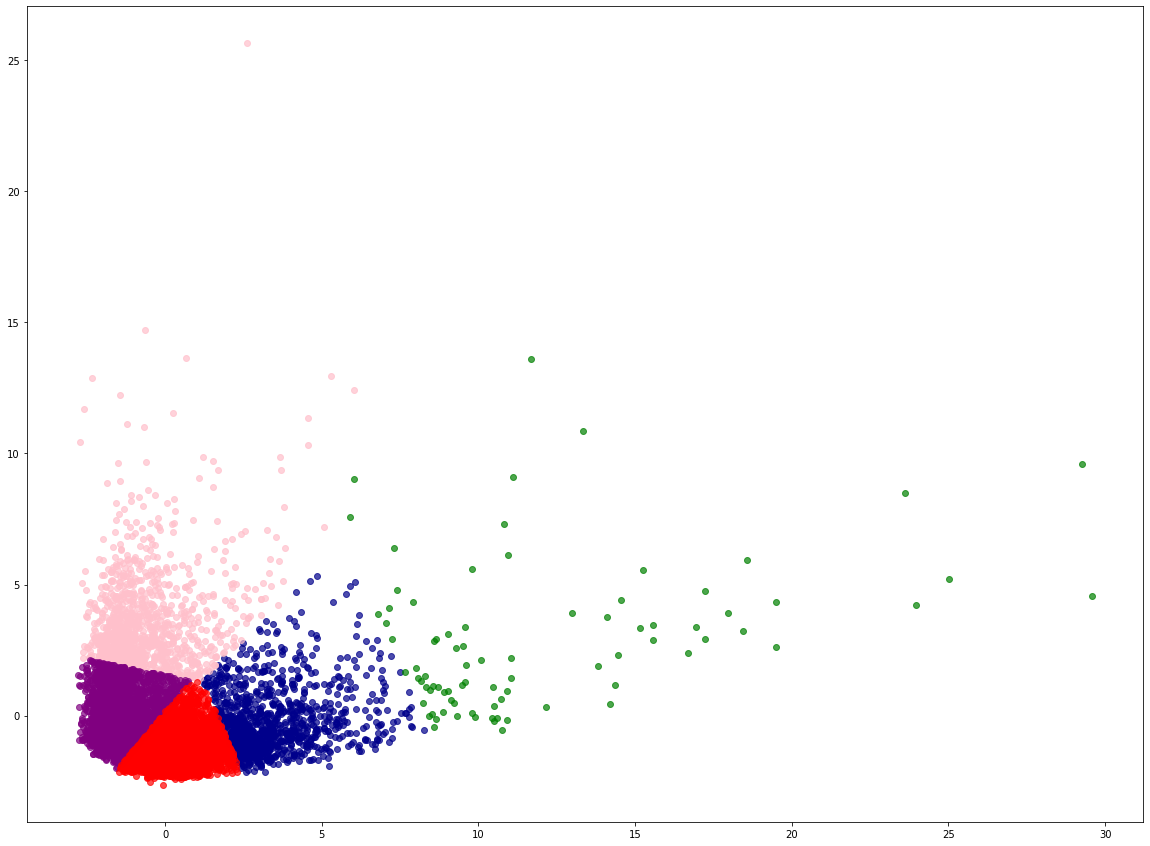

In [92]:
km = KMeans(n_clusters=5)
y_km = km.fit_predict(x_pca)
plt.figure(figsize=(20,15))
plt.scatter(x_pca[y_km == 0,0], x_pca[y_km == 0,1], c= 'darkblue', alpha=0.7) 
plt.scatter(x_pca[y_km == 1,0], x_pca[y_km == 1,1], c= 'pink', alpha=0.7) 
plt.scatter(x_pca[y_km == 2,0], x_pca[y_km == 2,1], c= 'purple', alpha=0.7) 
plt.scatter(x_pca[y_km == 3,0], x_pca[y_km == 3,1], c= 'green', alpha=0.7) 
plt.scatter(x_pca[y_km == 4,0], x_pca[y_km == 4,1], c= 'red', alpha=0.7) 

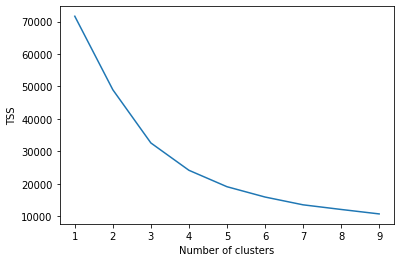

In [93]:
#what would be the optimal k value? using the elbow method:
Y=[]
for i in range(1,10):
        Y.append(KMeans(n_clusters=i).fit(x_pca).inertia_)
plt.xlabel("Number of clusters")
plt.ylabel("TSS")
plt.plot(range(1,10), Y)
#we can see that the ideal value is 3 or 4

when it comes to the different methods, the plots were all very different with varying clusters and cluster borders. <br>
we can see that kmeans has very clear boundary lines, whereas agglomerative was rougher on the edges. <br>
the runtime was also very different, the hierarchical clustering with the dendrogram took very long to compute, agglomerative was quick, with just a few seconds of computing. But Kmeans performed the best, with less than a second of computing.

### Step 4: Performance metrics

One of the most popular ways to calculate the performances in supervised learning models is the Silouhette Score.<br>
It calculates the mean distances between samples and the other points of the same cluster, as well as the mean distances between samples and all the other points in the next nearest cluster. and the score is the coefficient of both.<br>
This score is bounded between -1 and 1, -1 being incorrect clustering, and the higher the score, the better the clusters. Great clustering means dense and well separated clusters.

In [94]:
print(f"agglomerative score: {silhouette_score(x_pca, agglomerative.fit_predict(x_pca))}")
print(f"hierarchical score: {silhouette_score(x_pca, labels)}")
print(f"kmeans score: {silhouette_score(x_pca, KMeans(n_clusters=3).fit_predict(x_pca))}")

agglomerative score: 0.4348190844847789
hierarchical score: 0.44810086559102014
kmeans score: 0.451192974270244
